# Load directions etc. from algonauts challenge

In [2]:
import os
import numpy as np

In [3]:
data_dir = '../data'
parent_submission_dir = '../algonauts_2023_challenge_submission'

In [4]:
subj = 1 #@param ["1", "2", "3", "4", "5", "6", "7", "8"] {type:"raw", allow-input: true}

In [5]:
class argObj:
  def __init__(self, data_dir, parent_submission_dir, subj):
    
    self.subj = format(subj, '02')
    self.data_dir = os.path.join(data_dir, 'subj'+self.subj)
    self.parent_submission_dir = parent_submission_dir
    self.subject_submission_dir = os.path.join(self.parent_submission_dir,
        'subj'+self.subj)

    # Create the submission directory if not existing
    if not os.path.isdir(self.subject_submission_dir):
        os.makedirs(self.subject_submission_dir)

args = argObj(data_dir, parent_submission_dir, subj)

In [6]:
fmri_dir = os.path.join(args.data_dir, 'training_split', 'training_fmri')
lh_fmri = np.load(os.path.join(fmri_dir, 'lh_training_fmri.npy'))
rh_fmri = np.load(os.path.join(fmri_dir, 'rh_training_fmri.npy'))

print('LH training fMRI data shape:')
print(lh_fmri.shape)
print('(Training stimulus images × LH vertices)')

print('\nRH training fMRI data shape:')
print(rh_fmri.shape)
print('(Training stimulus images × RH vertices)')

LH training fMRI data shape:
(9841, 19004)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(9841, 20544)
(Training stimulus images × RH vertices)


In [7]:
train_img_dir  = os.path.join(args.data_dir, 'training_split', 'training_images')
test_img_dir  = os.path.join(args.data_dir, 'test_split', 'test_images')

# Create lists will all training and test image file names, sorted
train_img_list = os.listdir(train_img_dir)
train_img_list.sort()
test_img_list = os.listdir(test_img_dir)
test_img_list.sort()
print('Training images: ' + str(len(train_img_list)))
print('Test images: ' + str(len(test_img_list)))

Training images: 9843
Test images: 159


In [8]:
rand_seed = 5 #@param
np.random.seed(rand_seed)

# Calculate how many stimulus images correspond to 90% of the training data
num_train = int(np.round(len(train_img_list) / 100 * 90))
# Shuffle all training stimulus images
idxs = np.arange(len(train_img_list))
np.random.shuffle(idxs)
# Assign 90% of the shuffled stimulus images to the training partition,
# and 10% to the test partition
idxs_train, idxs_val = idxs[:num_train], idxs[num_train:]
# No need to shuffle or split the test stimulus images
idxs_test = np.arange(len(test_img_list))

print('Training stimulus images: ' + format(len(idxs_train)))
print('\nValidation stimulus images: ' + format(len(idxs_val)))
print('\nTest stimulus images: ' + format(len(idxs_test)))

Training stimulus images: 8859

Validation stimulus images: 984

Test stimulus images: 159


In [9]:
train_img_list_train = [train_img_list[i] for i in idxs_train]
train_img_list_val = [train_img_list[i] for i in idxs_val]

In [10]:
import shutil
# create directories for train splits
train_img_dir_train  = os.path.join(args.data_dir, 'training_split', 'training_images', 'train')
train_img_dir_val  = os.path.join(args.data_dir, 'training_split', 'training_images', 'val')
if not os.path.isdir(train_img_dir_train):
   os.makedirs(train_img_dir_train)
   for item in train_img_list_train:
        shutil.copy(os.path.join(args.data_dir, 'training_split', 'training_images', item), train_img_dir_train)
if not os.path.isdir(train_img_dir_val):
   os.makedirs(train_img_dir_val)
   for item in train_img_list_val:
        shutil.copy(os.path.join(args.data_dir, 'training_split', 'training_images', item), train_img_dir_val)


# Load .pb model

Download the pretrained keras model named RetinaNet for object detection on the coco dataset

In [11]:
from huggingface_hub import from_pretrained_keras
pretrained_model = from_pretrained_keras("keras-io/Object-Detection-RetinaNet", compile=False)

2023-03-27 13:51:39.916787: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-27 13:51:40.180243: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-27 13:51:41.192893: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-27 13:51:41.192940: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

2023-03-27 13:51:43.268165: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-27 13:51:43.268433: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-27 13:51:43.268460: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (thinkpad-l14-gen-2): /proc/driver/nvidia/version does not exist
2023-03-27 13:51:43.269274: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/annalena/anaconda3/envs/algonauts/lib/p

In [12]:
import keras
import numpy as np
import tensorflow as tf

Get Model architecture from https://keras.io/examples/vision/retinanet/#building-retinanet-using-a-subclassed-model that is in fact corresponding to the huggingface model.
Add an extract features function to get features from the ResNet backbone and feature pyramid

In [13]:
def get_backbone():
    """Builds ResNet50 with pre-trained imagenet weights"""
    backbone = keras.applications.ResNet50(
        include_top=False, input_shape=[None, None, 3]
    )
    c3_output, c4_output, c5_output = [
        backbone.get_layer(layer_name).output
        for layer_name in ["conv3_block4_out", "conv4_block6_out", "conv5_block3_out"]
    ]
    return keras.Model(
        inputs=[backbone.inputs], outputs=[c3_output, c4_output, c5_output]
    )
class FeaturePyramid(keras.layers.Layer):
    """Builds the Feature Pyramid with the feature maps from the backbone.

    Attributes:
      num_classes: Number of classes in the dataset.
      backbone: The backbone to build the feature pyramid from.
        Currently supports ResNet50 only.
    """

    def __init__(self, backbone=None, **kwargs):
        super().__init__(name="FeaturePyramid", **kwargs)
        self.backbone = backbone if backbone else get_backbone()
        self.conv_c3_1x1 = keras.layers.Conv2D(256, 1, 1, "same")
        self.conv_c4_1x1 = keras.layers.Conv2D(256, 1, 1, "same")
        self.conv_c5_1x1 = keras.layers.Conv2D(256, 1, 1, "same")
        self.conv_c3_3x3 = keras.layers.Conv2D(256, 3, 1, "same")
        self.conv_c4_3x3 = keras.layers.Conv2D(256, 3, 1, "same")
        self.conv_c5_3x3 = keras.layers.Conv2D(256, 3, 1, "same")
        self.conv_c6_3x3 = keras.layers.Conv2D(256, 3, 2, "same")
        self.conv_c7_3x3 = keras.layers.Conv2D(256, 3, 2, "same")
        self.upsample_2x = keras.layers.UpSampling2D(2)

    def call(self, images, training=False):
        c3_output, c4_output, c5_output = self.backbone(images, training=training)
        p3_output = self.conv_c3_1x1(c3_output)
        p4_output = self.conv_c4_1x1(c4_output)
        p5_output = self.conv_c5_1x1(c5_output)
        p4_output = p4_output + self.upsample_2x(p5_output)
        p3_output = p3_output + self.upsample_2x(p4_output)
        p3_output = self.conv_c3_3x3(p3_output)
        p4_output = self.conv_c4_3x3(p4_output)
        p5_output = self.conv_c5_3x3(p5_output)
        p6_output = self.conv_c6_3x3(c5_output)
        p7_output = self.conv_c7_3x3(tf.nn.relu(p6_output))
        return p3_output, p4_output, p5_output, p6_output, p7_output

    
    def extract_features(self, images):
        c3_output, c4_output, c5_output = self.backbone(images, training=False)
        p3_output = self.conv_c3_1x1(c3_output)
        p4_output = self.conv_c4_1x1(c4_output)
        p5_output = self.conv_c5_1x1(c5_output)
        p4_output = p4_output + self.upsample_2x(p5_output)
        p3_output = p3_output + self.upsample_2x(p4_output)
        p3_output = self.conv_c3_3x3(p3_output)
        p4_output = self.conv_c4_3x3(p4_output)
        p5_output = self.conv_c5_3x3(p5_output)
        p6_output = self.conv_c6_3x3(c5_output)
        p7_output = self.conv_c7_3x3(tf.nn.relu(p6_output))
        return c3_output, c4_output, c5_output, p3_output, p4_output, p5_output, p6_output, p7_output

def build_head(output_filters, bias_init):
    """Builds the class/box predictions head.

    Arguments:
      output_filters: Number of convolution filters in the final layer.
      bias_init: Bias Initializer for the final convolution layer.

    Returns:
      A keras sequential model representing either the classification
        or the box regression head depending on `output_filters`.
    """
    head = keras.Sequential([keras.Input(shape=[None, None, 256])])
    kernel_init = tf.initializers.RandomNormal(0.0, 0.01)
    for _ in range(4):
        head.add(
            keras.layers.Conv2D(256, 3, padding="same", kernel_initializer=kernel_init)
        )
        head.add(keras.layers.ReLU())
    head.add(
        keras.layers.Conv2D(
            output_filters,
            3,
            1,
            padding="same",
            kernel_initializer=kernel_init,
            bias_initializer=bias_init,
        )
    )
    return head
class RetinaNet(keras.Model):
    """A subclassed Keras model implementing the RetinaNet architecture.

    Attributes:
      num_classes: Number of classes in the dataset.
      backbone: The backbone to build the feature pyramid from.
        Currently supports ResNet50 only.
    """

    def __init__(self, num_classes, backbone=None, **kwargs):
        super().__init__(name="RetinaNet", **kwargs)
        self.fpn = FeaturePyramid(backbone)
        self.num_classes = num_classes

        prior_probability = tf.constant_initializer(-np.log((1 - 0.01) / 0.01))
        self.cls_head = build_head(9 * num_classes, prior_probability)
        self.box_head = build_head(9 * 4, "zeros")

    def call(self, image, training=False):
        features = self.fpn(image, training=training)
        N = tf.shape(image)[0]
        cls_outputs = []
        box_outputs = []
        for feature in features:
            box_outputs.append(tf.reshape(self.box_head(feature), [N, -1, 4]))
            cls_outputs.append(
                tf.reshape(self.cls_head(feature), [N, -1, self.num_classes])
            )
        cls_outputs = tf.concat(cls_outputs, axis=1)
        box_outputs = tf.concat(box_outputs, axis=1)
        return tf.concat([box_outputs, cls_outputs], axis=-1)

    def extract_features(self, image):
      features = self.fpn.extract_features(image)
      return features



Build the default, non-rained retinanet model that is the base for the pretrained model (to kow the structure and have access to the features), build it on default input, load the weights from the pretrained model

In [14]:
num_classes = 80
resnet50_backbone = get_backbone()
model = RetinaNet(num_classes, resnet50_backbone)
dummy_input = tf.ones((1,384,512,3))
model(dummy_input)
model.set_weights(pretrained_model.get_weights())

/home/annalena/anaconda3/envs/algonauts/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [15]:
features = model.extract_features(dummy_input)

# Load a pre-trained YOLOv5 model and fet intermediate feature maps

inspired by official notebook https://tfhub.dev/neso613/lite-model/yolo-v5-tflite/tflite_model/1

In [11]:
import numpy as np
import tensorflow as tf

batch_size = 100

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="../lite-model_yolo-v5-tflite_tflite_model_1.tflite")
interpreter.resize_tensor_input(0, [batch_size, 320, 320, 3]);
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [12]:
# Test model on random input data.
input_shape = input_details[0]['shape']
print(input_shape)
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data.shape)

[100 320 320   3]
(100, 6300, 85)


# Load datasets

In [27]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [28]:
lh_fmri_train = lh_fmri[idxs_train]
lh_fmri_val = lh_fmri[idxs_val]
rh_fmri_train = rh_fmri[idxs_train]
rh_fmri_val = rh_fmri[idxs_val]

IndexError: index 9841 is out of bounds for axis 0 with size 9841

In [43]:
del lh_fmri, rh_fmri

In [52]:
img_height = 320
img_width = 320
batch_size = 100

tmp = tf.keras.utils.image_dataset_from_directory(
  train_img_dir_train,
  color_mode="rgb",
  labels=None,
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=None)


Found 8857 files belonging to 1 classes.


In [16]:
img_height = 320
img_width = 320
batch_size = 100

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_img_dir,
  validation_split=0.2,
  subset = "training",
  color_mode="rgb",
  labels=None,
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=None)

val_ds = tf.keras.utils.image_dataset_from_directory(
  train_img_dir,
  validation_split=0.2,
  subset = "validation",
  color_mode="rgb",
  labels=None,
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=None)

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_img_dir,
  color_mode="rgb",
  labels=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=None)

Found 19682 files belonging to 1 classes.
Using 15746 files for training.
Found 19682 files belonging to 1 classes.
Using 3936 files for validation.
Found 159 files belonging to 1 classes.


In [17]:
def normalize_rgb(img):
    '''
    output[channel] = (input[channel] - mean[channel]) / std[channel]
    Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # normalize the images color channels
    '''
    out = []
    out.append(img[:,:,:,0] - 0.485 / 0.229)
    out.append(img[:,:,:,1] - 0.456 / 0.224)
    out.append(img[:,:,:,2] - 0.406 / 0.225)
    return tf.stack(out, axis=-1)

In [18]:
def preprocess(ds, batch_size):
    ds = ds.batch(batch_size, drop_remainder=True)
    ds = ds.map(lambda x: normalize_rgb(x))
    return ds

In [19]:
train_ds = preprocess(train_ds, batch_size)
val_ds = preprocess(val_ds, batch_size)
test_ds = preprocess(test_ds, batch_size)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


# Get single feature map

Probably ...

from 

https://github.com/ultralytics/yolov5/blob/85f6019e5af2641e33139e97415b7bd1dc72d779/models/hub/yolov5-p2.yaml
https://iq.opengenus.org/yolov5/

Backbone outputs after bottleneck CSP: 181, 216

Backbone SPP: 265

PANet neck: bottleneck CSP: 302, 325

PANet head: 344, 365

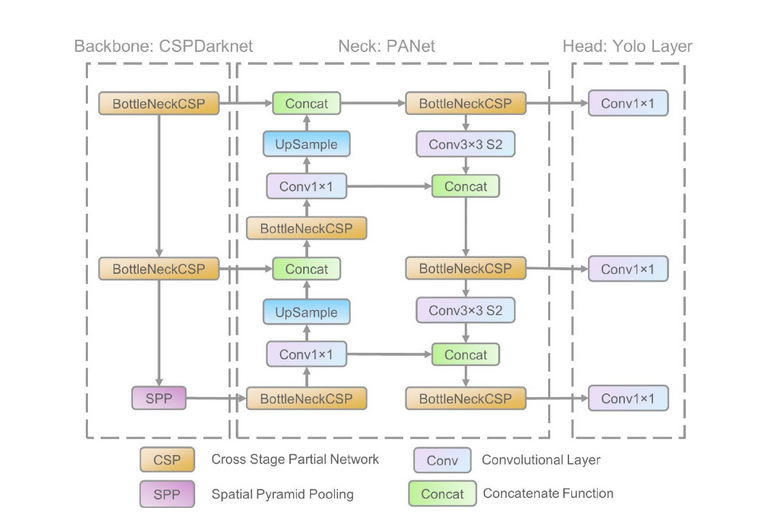

In [19]:
out_tensor = "181" #@param [181, 216, 265, 302, 325, 344, 365] {allow-input: true}
X= interpreter.get_tensor(int(out_tensor))

# PCA

In [20]:
from tqdm import tqdm
import sklearn
from sklearn.decomposition import IncrementalPCA

In [21]:
def fit_pca(dataloader, batch_size):

    feature_indx = 0

    # Define PCA parameters
    pca = IncrementalPCA(n_components=50, batch_size=batch_size)

    # Fit PCA to batch
    for _, d in tqdm(enumerate(dataloader), total=len(dataloader)):
        # Extract features 
        ft = model.extract_features(d)[feature_indx]
        # Flatten the features
        ft = np.hstack([np.reshape(l,(batch_size,-1)) for l in ft])
        # Fit PCA to batch
        pca.partial_fit(ft)
    return pca

In [22]:
# stürzt nicht ab, aber braucht seehr lange: für 100 batchsize, 50 n_components: 50 min
pca = fit_pca(train_ds, 100)

  4%|▍         | 7/157 [04:38<1:40:58, 40.39s/it]

: 

: 

In [24]:
def extract_features(feature_extractor, dataloader, pca):

    features = []
    for _, d in tqdm(enumerate(dataloader), total=len(dataloader)):
        # Extract features
        ft = feature_extractor(d,batch_size)
        # Apply PCA transform
        ft = pca.transform(ft)
        features.append(ft)
    return np.vstack(features)

In [39]:
features_train = extract_features(feature_extractor, val_ds, pca)

print('\nTraining images features:')
print(features_train.shape)
print('(Training stimulus images × PCA features)')


100%|██████████| 1/1 [00:09<00:00,  9.84s/it]


Training images features:
(100, 50)
(Training stimulus images × PCA features)


In [ ]:
features_train = extract_features(feature_extractor, train_imgs_dataloader, pca)
features_val = extract_features(feature_extractor, val_imgs_dataloader, pca)
features_test = extract_features(feature_extractor, test_imgs_dataloader, pca)

print('\nTraining images features:')
print(features_train.shape)
print('(Training stimulus images × PCA features)')

print('\nValidation images features:')
print(features_val.shape)
print('(Validation stimulus images × PCA features)')

print('\nTest images features:')
print(features_val.shape)
print('(Test stimulus images × PCA features)')

# Debug help

In [ ]:
# for debugging
details = interpreter.get_tensor_details()
#print(interpreter.get_tensor_details())
print(tf.lite.experimental.Analyzer.analyze(model_path="/content/drive/MyDrive/Colab Notebooks/pretrained/lite-model_yolo-v5-tflite_tflite_model_1.tflite"))

=== /content/drive/MyDrive/Colab Notebooks/pretrained/lite-model_yolo-v5-tflite_tflite_model_1.tflite ===

Your TFLite model has '1' subgraph(s). In the subgraph description below,
T# represents the Tensor numbers. For example, in Subgraph#0, the STRIDED_SLICE op takes
tensor #0 and tensor #148 and tensor #148 and tensor #149 as input and produces tensor #155 as output.

Subgraph#0 main(T#0) -> [T#422]
  Op#0 STRIDED_SLICE(T#0, T#148[0, 0, 0, 0], T#148[0, 0, 0, 0], T#149[1, 2, 2, 1]) -> [T#155]
  Op#1 STRIDED_SLICE(T#0, T#150[0, 1, 0, 0], T#148[0, 0, 0, 0], T#149[1, 2, 2, 1]) -> [T#156]
  Op#2 STRIDED_SLICE(T#0, T#151[0, 0, 1, 0], T#148[0, 0, 0, 0], T#149[1, 2, 2, 1]) -> [T#157]
  Op#3 STRIDED_SLICE(T#0, T#152[0, 1, 1, 0], T#148[0, 0, 0, 0], T#149[1, 2, 2, 1]) -> [T#158]
  Op#4 CONCATENATION(T#155, T#156, T#157, T#158) -> [T#159]
  Op#5 CONV_2D(T#159, T#127, T#62) -> [T#160]
  Op#6 LOGISTIC(T#160) -> [T#161]
  Op#7 MUL(T#160, T#161) -> [T#162]
  Op#8 PAD(T#162, T#141[0, 0, 1, 1, 1, ...